In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys

import numpy as np
import pandas as pd

sys.path.insert(0, '..')
from context.nd_array.nd_array.normalize_2d_array import normalize_2d_array
from context.fit_skew_t_pdf import fit_skew_t_pdf
from context.fit_skew_t_pdfs import fit_skew_t_pdfs
from context.compute_context import compute_context
from context.make_context_matrix_and_summarize_context import *
from context.plot_context import plot_context

In [3]:
feature_x_sample = pd.read_table('feature_x_sample.tsv', index_col=0)

# feature_x_sample

In [4]:
feature_x_sample = pd.DataFrame(
    normalize_2d_array(feature_x_sample.values, '-0-'),
    index=feature_x_sample.index,
    columns=feature_x_sample.columns)

# feature_x_sample

In [5]:
array_1d = np.random.random_sample(10)

In [6]:
n, location, scale, df, shape = fit_skew_t_pdf(array_1d)
print('N={}\tLocation={:.3f}\tScale={:.3f}\tDF={:.3f}\tShape={:.3f}'.format(
    n, location, scale, df, shape))

n, location, scale, df, shape = fit_skew_t_pdf(
    array_1d, fit_fixed_location=10, fit_fixed_scale=10)
print('N={}\tLocation={:.3f}\tScale={:.3f}\tDF={:.3f}\tShape={:.3f}'.format(
    n, location, scale, df, shape))

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


N=10	Location=0.258	Scale=0.405	DF=18153970.976	Shape=9534901.789
N=10	Location=10.000	Scale=10.000	DF=14163340.211	Shape=-16799703.676


In [7]:
context_dict = compute_context(array_1d)

for key, value in context_dict.items():
    print(key)
    print(value)
    print(value.shape)
    print()

fit
[  1.00000000e+01   2.58204819e-01   4.05106663e-01   1.81539710e+07
   9.53490179e+06]
(5,)

grid
[ 0.25820503  0.25841199  0.25861894 ...,  0.87846114  0.8786681
  0.87887506]
(3000,)

pdf
[ 1.96956552  1.96956629  1.96956552 ...,  0.60999123  0.60951421
  0.60903739]
(3000,)

pdf_transformed
[ 1.96956393  1.9695648   1.96956399 ...,  0.          0.          0.        ]
(3000,)

context_indices
[-0.88754198  0.88703801  0.88724284 ...,  1.          1.          1.        ]
(3000,)

context_indices_like_array
[-0.88754198  1.          1.          1.          1.          1.          1.
  1.          1.          1.        ]
(10,)

context_summary
5.87647760694
()



/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


In [8]:
feature_x_skew_t_pdf_fit_parameter = fit_skew_t_pdfs(feature_x_sample)

feature_x_skew_t_pdf_fit_parameter

(1/9) KRAS ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


(2/9) SOX10 ...
(3/9) ERBB3 ...
(4/9) MYC ...
(5/9) MAP4K4 ...
(6/9) GAPDH ...
(7/9) FAT1 ...
(8/9) PTEN ...
(9/9) TP53 ...


,N,Location,Scale,DF,Shape
Feature,,,,,
KRAS,501.0,1.083133,1.164275,4.304392,-3.030155
SOX10,501.0,0.550756,0.592344,2.306226,-0.929914
ERBB3,501.0,0.452074,0.606843,3.987367,-1.111803
MYC,501.0,-0.946118,1.227359,15.292884,2.261243
MAP4K4,501.0,0.482438,0.885836,7.522607,-0.764379
GAPDH,501.0,-1.666089,2.258010,1279.158480,2.326992
FAT1,501.0,-0.173529,0.362648,15.376174,0.699471
PTEN,501.0,-0.808029,1.057576,198799.571299,3.093096
TP53,501.0,-1.357790,1.506077,6.161618,5.347668


In [9]:
context__feature_x_sample, feature_context_summary = make_context_matrix_and_summarize_context(
    feature_x_sample)

(1/9) KRAS ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


(2/9) SOX10 ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


(3/9) ERBB3 ...
(4/9) MYC ...
(5/9) MAP4K4 ...
(6/9) GAPDH ...
(7/9) FAT1 ...
(8/9) PTEN ...
(9/9) TP53 ...


In [10]:
context__feature_x_sample

,22RV1_PROSTATE,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,786O_KIDNEY,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A549_LUNG,A673_BONE,ACHN_KIDNEY,...,UACC812_BREAST,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,ZR751_BREAST
Feature,,,,,,,,,,,,,,,,,,,,,
KRAS,0.000000,0.000000e+00,-3.278829e-01,-7.999116e-01,0.000000,0.000000e+00,-0.000000,-9.948973e-01,0.00000,0.000000,...,-0.569443,0.000000,-5.987671e-01,-0.000000e+00,-0.175733,-0.130303,-0.659264,-9.044621e-01,0.000000,-0.809649
SOX10,-0.834981,0.000000e+00,0.000000e+00,-8.518207e-01,0.000000,-4.016508e-01,-1.000000,0.000000e+00,0.00000,-0.497736,...,0.000000,-1.000000,-5.600091e-01,-1.000000e+00,-1.000000,-0.999994,-1.000000,-2.042137e-03,-0.749865,0.000000
ERBB3,0.000000,0.000000e+00,-2.087570e-01,0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.00000,-0.000000,...,-1.000000,0.000000,0.000000e+00,0.000000e+00,-0.000000,0.000000,0.000000,-7.818820e-01,-0.145468,-0.037106
MYC,0.529448,2.155811e-01,-0.000000e+00,8.061275e-01,0.714906,1.268069e-01,0.636192,0.000000e+00,0.09358,0.131858,...,0.099964,0.602291,-0.000000e+00,0.000000e+00,0.000000,0.492989,-0.000000,-0.000000e+00,-0.000000,-0.000000
MAP4K4,0.000000,-9.059935e-04,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,-0.000000e+00,-0.00000,0.000000,...,-0.000000,-0.000000,-0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.000000
GAPDH,0.261509,-0.000000e+00,-0.000000e+00,5.042089e-01,-0.000000,5.346786e-01,-0.000000,2.998354e-02,0.00000,0.606638,...,0.180463,0.273454,-0.000000e+00,3.944150e-01,-0.000000,0.001266,-0.000000,0.000000e+00,-0.000000,0.026413
FAT1,0.000000,-0.000000e+00,1.441630e-10,0.000000e+00,-0.000000,0.000000e+00,-0.000000,-0.000000e+00,-0.00000,-0.000000,...,-0.000000,-0.000000,0.000000e+00,-0.000000e+00,-0.000000,-0.000000,0.014551,5.193513e-13,0.008534,-0.000000
PTEN,-0.000000,7.789792e-09,-0.000000e+00,1.448880e-14,-0.000000,2.491223e-11,-0.000000,1.274370e-28,-0.00000,-0.000000,...,-0.000000,-0.000000,2.627785e-07,2.921404e-12,-0.000000,-0.000000,0.640445,2.033589e-04,0.287045,-0.000000
TP53,0.448225,9.999999e-01,2.623107e-01,9.999999e-01,0.999777,9.999993e-01,-0.000000,9.677995e-01,0.00000,0.973058,...,0.312668,1.000000,9.990422e-01,1.000000e+00,1.000000,1.000000,0.340040,0.000000e+00,-0.000000,1.000000


In [11]:
feature_context_summary

Feature
KRAS     -198.543315
SOX10    -139.732710
ERBB3     -73.107958
MYC       115.802537
MAP4K4    -43.960232
GAPDH     140.186960
FAT1        2.300604
PTEN       77.328362
TP53      244.191914
Name: Context Summary, dtype: float64

In [12]:
absolute_value_weighted_context__feature_x_sample = feature_x_sample.abs(
) * context__feature_x_sample

absolute_value_weighted_context__feature_x_sample

,22RV1_PROSTATE,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,786O_KIDNEY,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A549_LUNG,A673_BONE,ACHN_KIDNEY,...,UACC812_BREAST,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,ZR751_BREAST
KRAS,0.000000,0.000000e+00,-1.622879e-02,-2.990596e-01,0.000000,0.000000e+00,-0.000000,-9.944095e-01,0.000000,0.000000,...,-0.082189,0.000000,-1.012493e-01,-0.000000e+00,-0.029817,-0.026896,-0.146742,-4.879093e-01,0.000000,-0.312264
SOX10,-0.755148,0.000000e+00,0.000000e+00,-7.917368e-01,0.000000,-2.046833e-01,-3.134450,0.000000e+00,0.000000,-0.289957,...,0.000000,-4.222437,-3.538552e-01,-3.501257e+00,-4.419310,-2.197733,-3.934379,-2.047721e-04,-0.602024,0.000000
ERBB3,0.000000,0.000000e+00,-1.200111e-01,0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000e+00,0.000000,-0.000000,...,-3.144812,0.000000,0.000000e+00,0.000000e+00,-0.000000,0.000000,0.000000,-8.100167e-01,-0.074523,-0.012850
MYC,0.492199,1.296025e-01,-0.000000e+00,1.015871e+00,0.810838,6.049240e-02,0.663287,0.000000e+00,0.039057,0.064049,...,0.042902,0.605849,-0.000000e+00,0.000000e+00,0.000000,0.440222,-0.000000,-0.000000e+00,-0.000000,-0.000000
MAP4K4,0.000000,-6.667263e-04,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,-0.000000e+00,-0.000000,0.000000,...,-0.000000,-0.000000,-0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.000000
GAPDH,0.464818,-0.000000e+00,-0.000000e+00,1.098706e+00,-0.000000,1.191694e+00,-0.000000,3.281393e-02,0.000000,1.424995,...,0.291741,0.491774,-0.000000e+00,7.890002e-01,-0.000000,0.000718,-0.000000,0.000000e+00,-0.000000,0.028145
FAT1,0.000000,-0.000000e+00,3.979256e-11,0.000000e+00,-0.000000,0.000000e+00,-0.000000,-0.000000e+00,-0.000000,-0.000000,...,-0.000000,-0.000000,0.000000e+00,-0.000000e+00,-0.000000,-0.000000,0.010560,1.249495e-13,0.005944,-0.000000
PTEN,-0.000000,4.270226e-11,-0.000000e+00,2.282157e-15,-0.000000,2.121674e-12,-0.000000,3.713336e-29,-0.000000,-0.000000,...,-0.000000,-0.000000,1.522280e-08,3.176403e-13,-0.000000,-0.000000,0.554508,4.681847e-05,0.196775,-0.000000
TP53,0.154386,1.166930e+00,1.208459e-01,1.192213e+00,0.688685,1.056473e+00,-0.000000,2.051629e-01,0.000000,0.228459,...,0.134196,2.690940,5.718234e-01,3.366528e+00,1.269305,1.307022,0.140871,0.000000e+00,-0.000000,1.096470


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


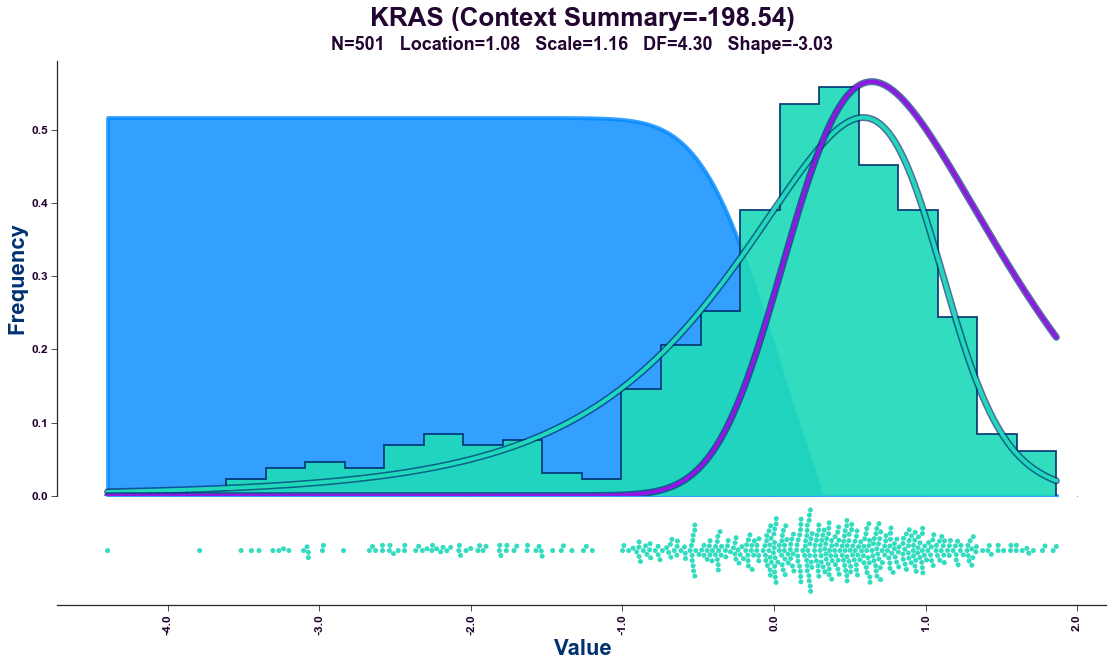

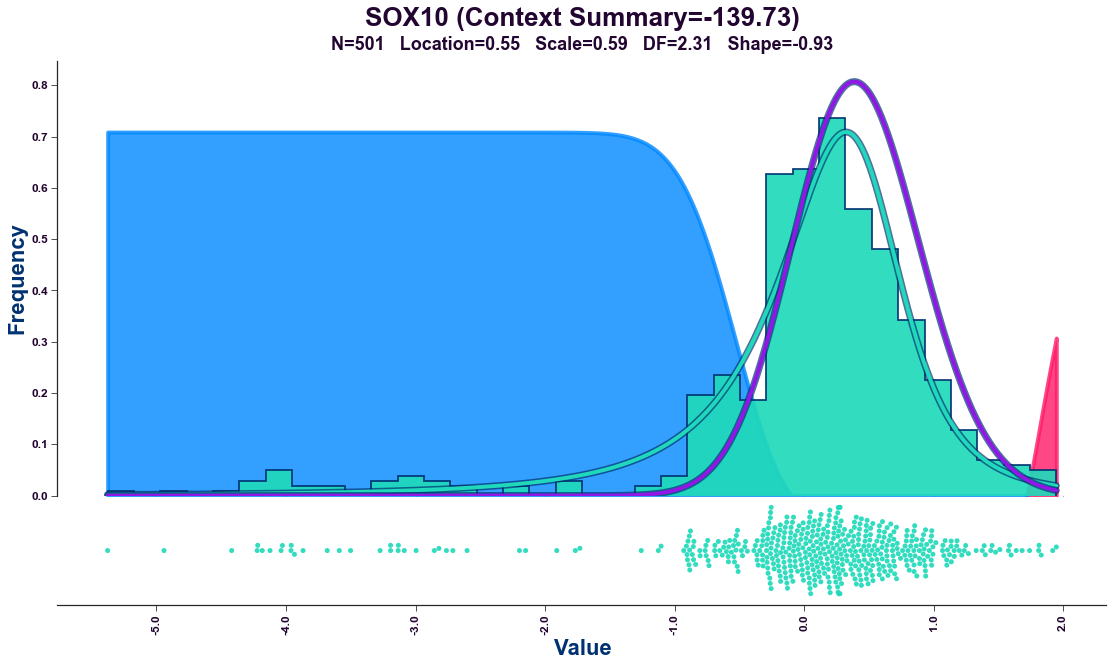

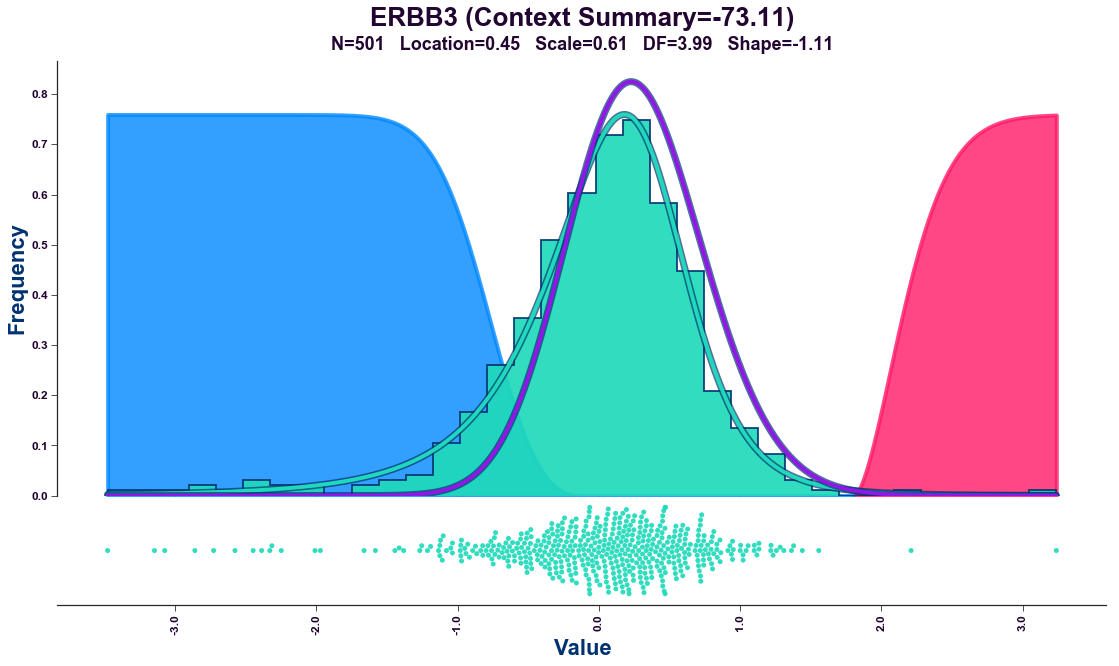

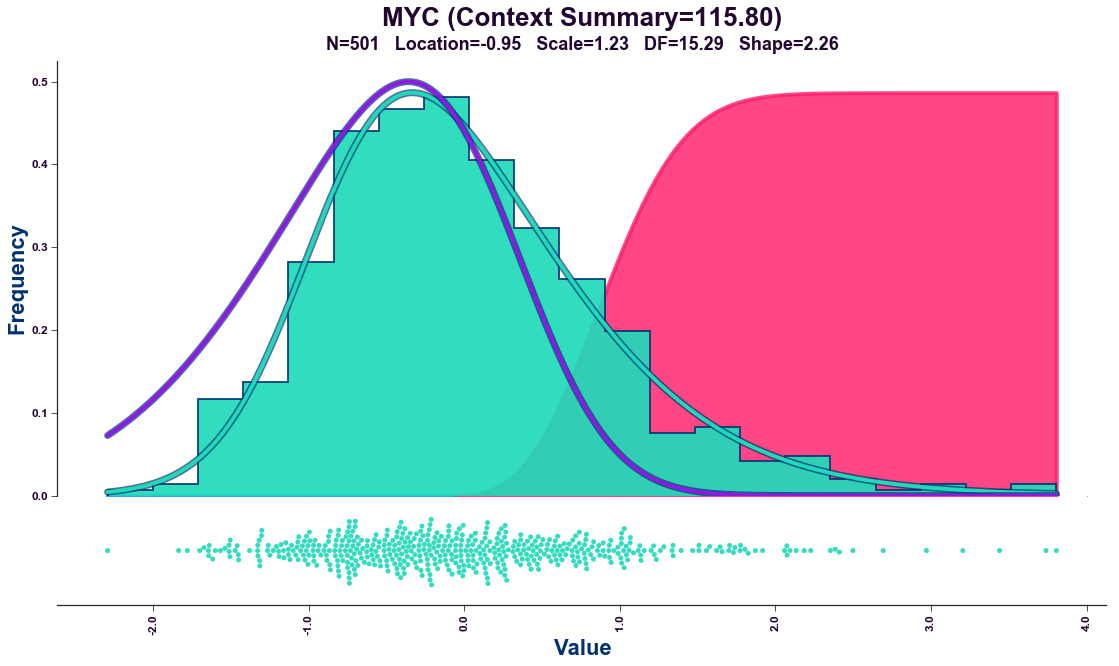

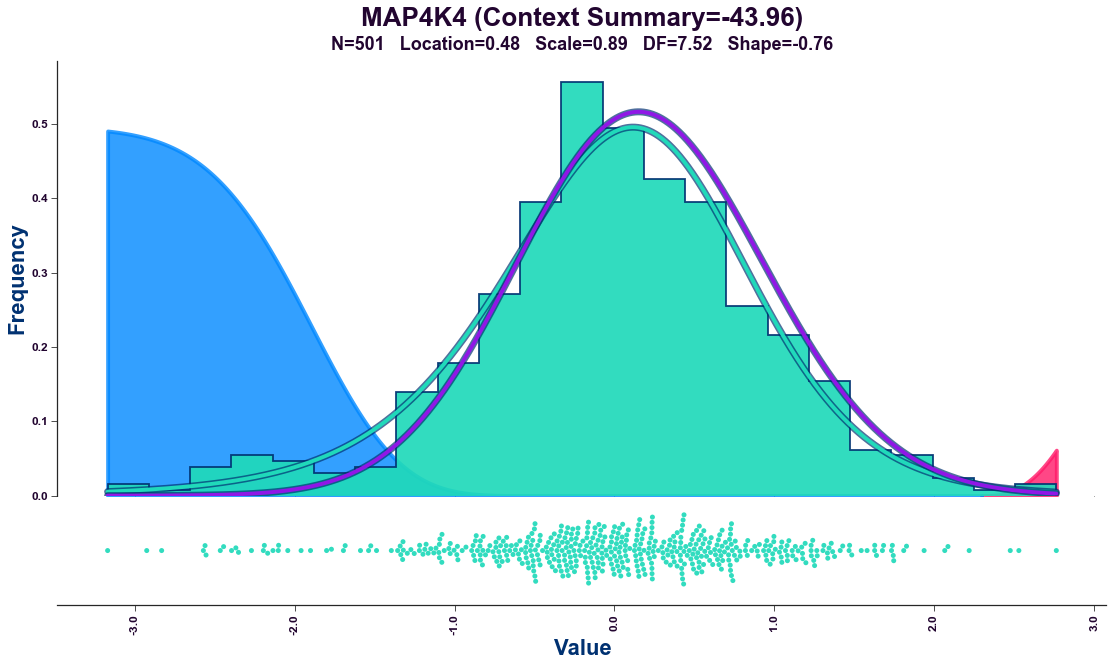

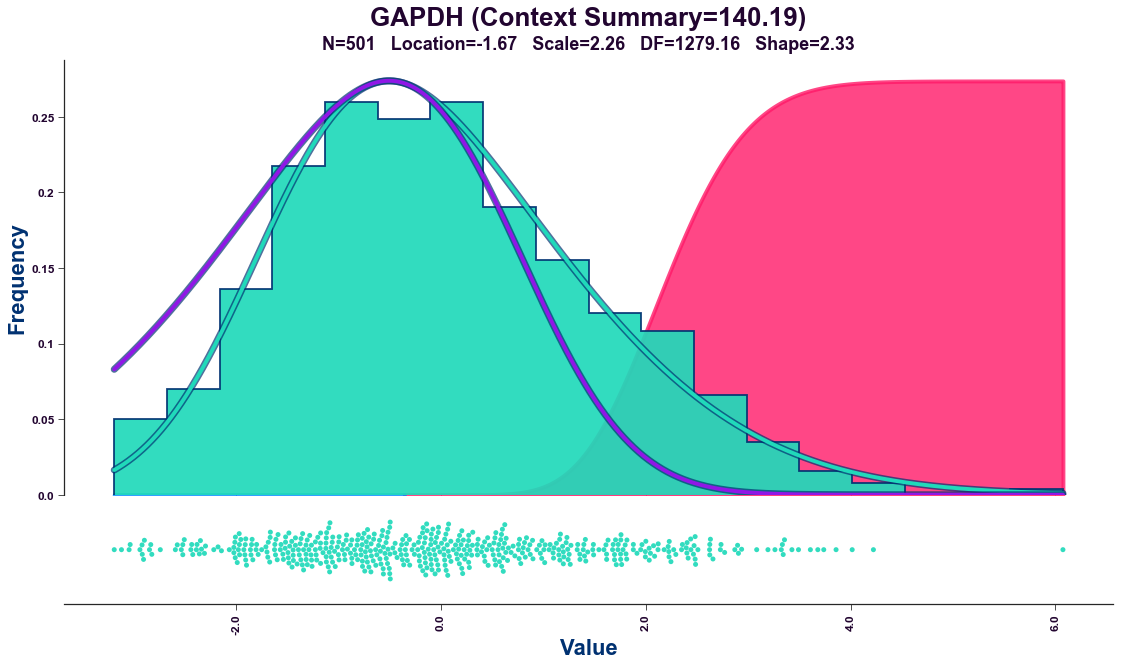

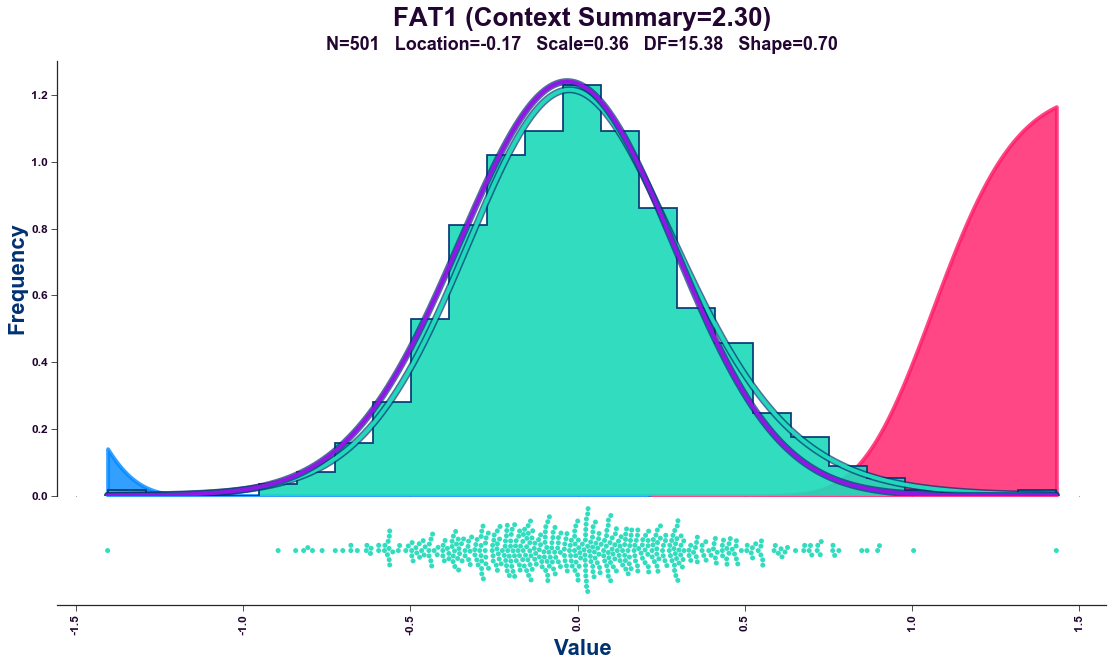

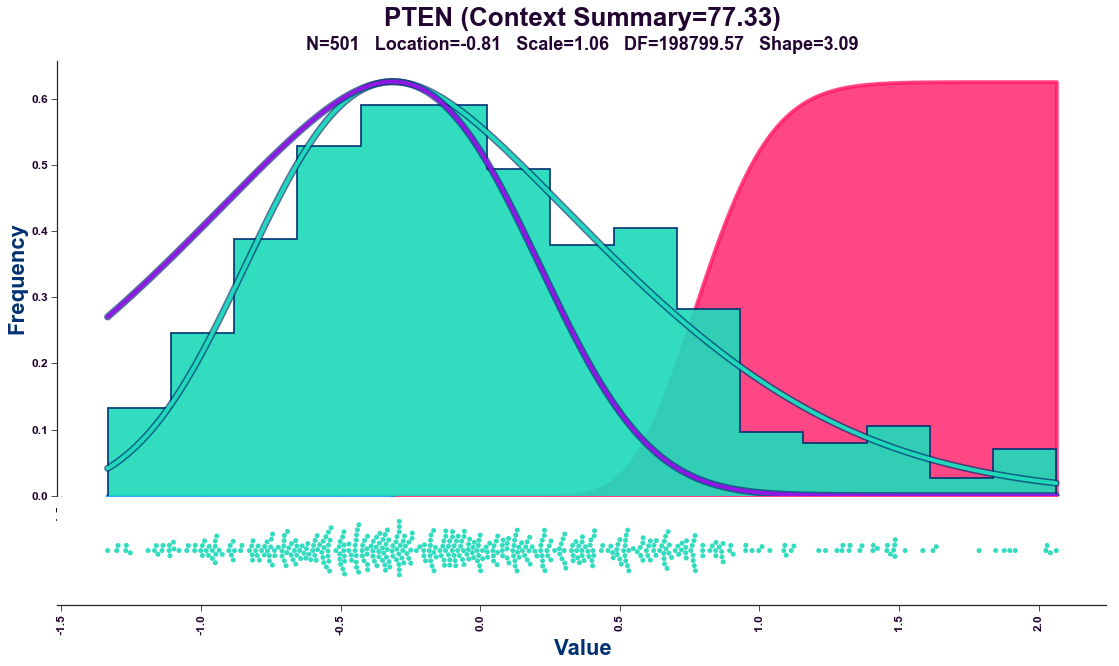

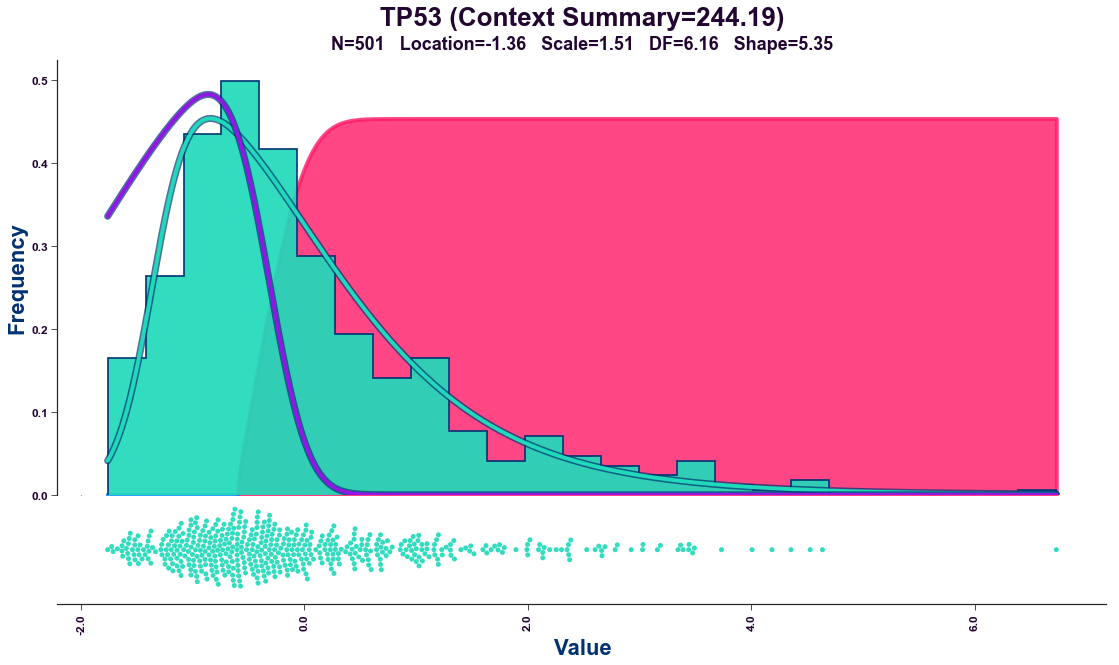

In [14]:
for feature, feature_vector in feature_x_sample.iterrows():
    plot_context(feature_vector, feature)